In [55]:
import pandas as pd
import numpy as np
from data_columns import childhood, demographic, diagnosis, all
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
init_df = pd.read_csv('./data/mental-health-comorbidity-raw.csv')
init_df.shape

(5001, 1000)

In [57]:
df = init_df[all()].copy()
df = df.replace(-9, np.nan)
df = df.dropna()
df.shape

(4959, 122)

In [58]:
def get_categorical_columns(df, exclude):
    return [col for col in df.columns if col not in exclude]

In [59]:
def make_count_plot(df,cat_columns):
    rows = int(len(df.columns)/3)
    fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(20, rows*2))
    axes = axes.flatten()

    for i, col in enumerate(cat_columns):
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Count of {col}')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [60]:
demographic_df = df[demographic()].copy()
num_columns = ["HHSIZE","AGE"]
cat_columns = get_categorical_columns(demographic_df, num_columns)
demographic_df[cat_columns] = demographic_df[cat_columns].astype("category")

demographic_df.columns

Index(['REGION', 'HHSIZE', 'RESEX', 'AGE', 'AGECAT', 'EDUCAT', 'MARCAT',
       'EMPCAT', 'PEREARN2', 'SPEARN2', 'OTHINC2', 'HHINCOME2', 'INCPERCAP2',
       'INC_CAT'],
      dtype='object')

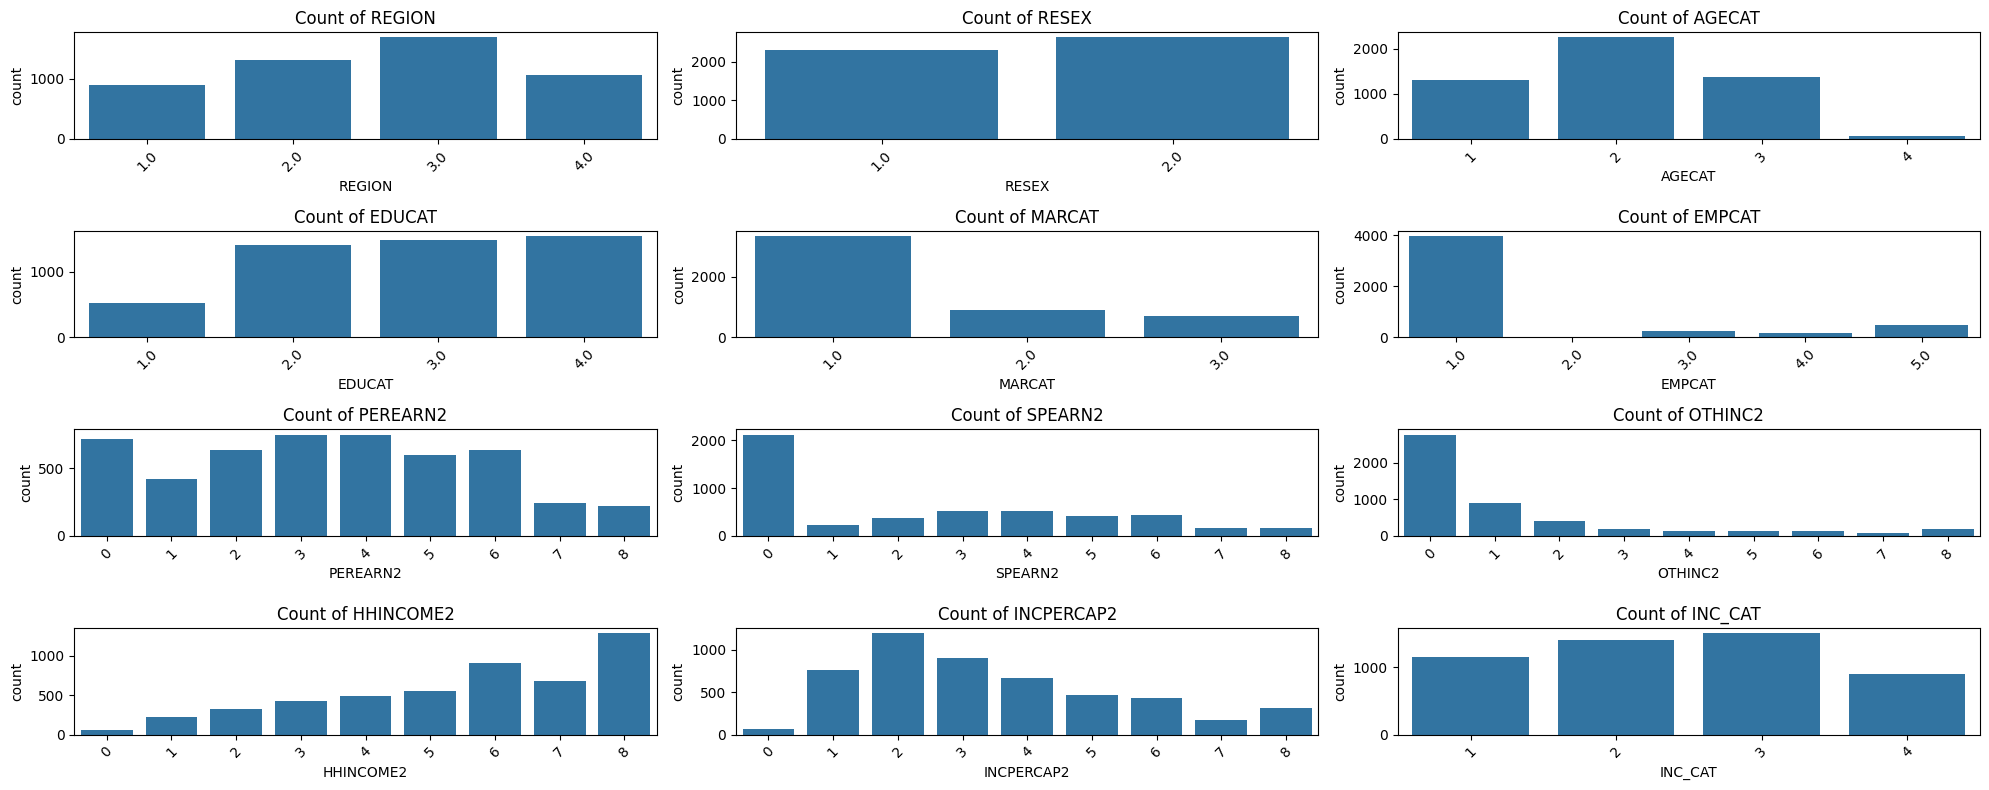

In [61]:
make_count_plot(demographic_df,cat_columns)

In [62]:
childhood_df = df[childhood()].copy()
num_columns = ["CH13","CH14","CH16","CH21","CH22","CH24","CH38","CH43","CH45"]
cat_columns = get_categorical_columns(childhood_df, num_columns)
childhood_df[cat_columns] = childhood_df[cat_columns].astype("category")
childhood_df[num_columns] = childhood_df[num_columns].astype(int)

childhood_df.columns

Index(['CH1', 'CH1A', 'CH9', 'CH9A', 'CH13', 'CH14', 'CH16', 'CH21', 'CH22',
       'CH24', 'CH37A', 'CH37B', 'CH37C', 'CH37D', 'CH37E', 'CH38', 'CH38_1',
       'CH39', 'CH42', 'CH43', 'CH44', 'CH45', 'CH46', 'CH47_1', 'CH47_2',
       'CH47_3', 'CH47_4', 'CH52', 'CH52A', 'CH60', 'CH60A', 'CH61', 'CH61A',
       'CH62', 'CH74', 'CH74_1', 'CH74_2', 'CH74_2A', 'CH74_2B', 'CH74_2C',
       'CH74_2D', 'CH74_2E', 'CH74_2F', 'CH75', 'CH76', 'CH76_1', 'CH76_2',
       'CH76_3', 'CH76_4', 'CH81', 'CH81A', 'CH89', 'CH89A', 'CH90', 'CH90A',
       'CH91', 'CH103', 'CH104', 'CH105', 'CH105A', 'CH105B', 'CH105C',
       'CH105D', 'CH105E', 'CH105F'],
      dtype='object')

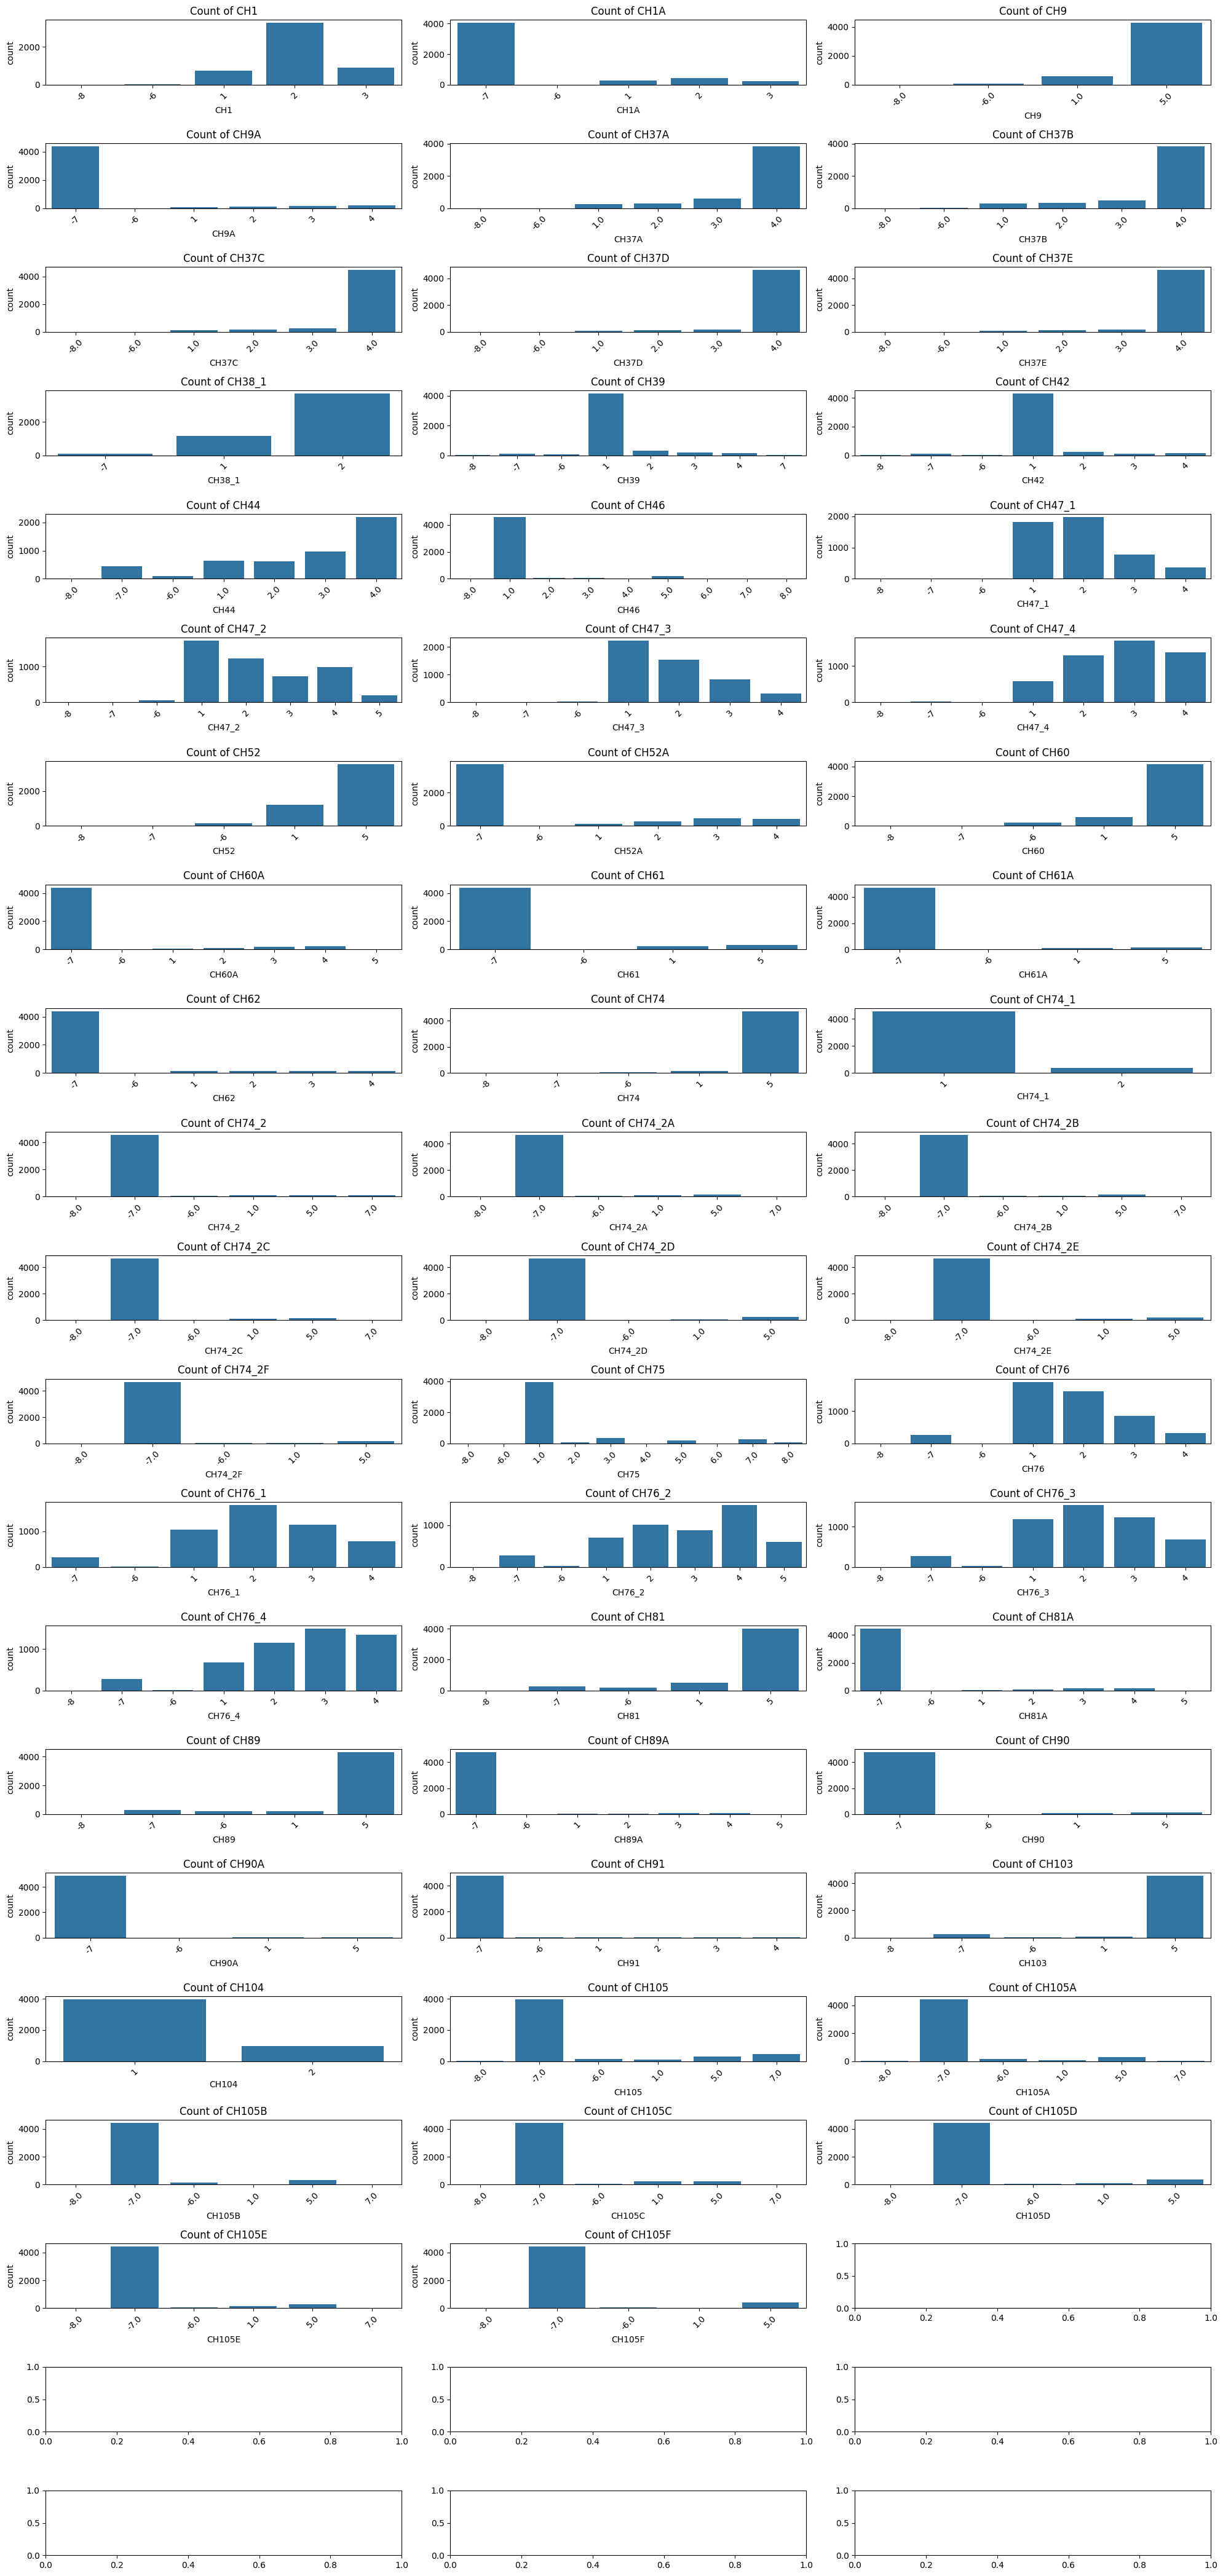

In [63]:
make_count_plot(childhood_df,cat_columns)